<a href="https://colab.research.google.com/github/jash-ai/PYTHON/blob/main/Advanced_Classificatin_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Classification

In this notebook, we will cover:

* Decision Tree Classifier
* Random Forest Classifier
* XGBoost Classifier
* AdaBoost
* Hyperparameter Tuning by GridSearchCV
* Tuning by Randomize Search
* Voting Classifier

Importing all necessary packages

In [1]:
#* xgboost-{version}-py2.py3-none-win_amd64.whl
!pip install xgboost

In [2]:
!pip install pydotplus

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Task 1: Load Data 'titanic_clean.csv'

In [4]:
#write code here
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### Task 2: Do One Hot encoding for categorical varaibles and store in df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Embarked     891 non-null    object
 7   Title        891 non-null    object
 8   GrpSize      891 non-null    object
 9   FareCat      891 non-null    object
 10  AgeCat       891 non-null    object
dtypes: int64(5), object(6)
memory usage: 76.7+ KB


In [6]:
#write code here
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [7]:
#Write code here to copy into df
df=df_OneHot.copy()

In [8]:
df.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [9]:
##can see that new columns have been created based on the onehot encoding applied
##ie the  previously it was called sex now we have 2 new fields called Sex_female and Sex_male
## the orginal column sex has been removed.
##value 1 is  true ie the value is correclty applied,
##value 0 is false ie the value is is not for this field.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   PassengerId          891 non-null    int64
 1   Survived             891 non-null    int64
 2   SibSp                891 non-null    int64
 3   Parch                891 non-null    int64
 4   Pclass_1             891 non-null    uint8
 5   Pclass_2             891 non-null    uint8
 6   Pclass_3             891 non-null    uint8
 7   Sex_female           891 non-null    uint8
 8   Sex_male             891 non-null    uint8
 9   Embarked_C           891 non-null    uint8
 10  Embarked_Q           891 non-null    uint8
 11  Embarked_S           891 non-null    uint8
 12  Title_Master         891 non-null    uint8
 13  Title_Miss           891 non-null    uint8
 14  Title_Mr             891 non-null    uint8
 15  Title_Mrs            891 non-null    uint8
 16  Title_Rare Title     891 n

Defining function to plot ROC AUC Curve

### Task 3: Create dependent and independent variables

In [10]:
#write code here
##in X drop  columns PassengerId and Survived
X = df.drop(['PassengerId','Survived'], axis=1)

# y will only containt the Survived field
Y = df['Survived']

In [11]:
##X does not have PassengerId and Survived
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SibSp                891 non-null    int64
 1   Parch                891 non-null    int64
 2   Pclass_1             891 non-null    uint8
 3   Pclass_2             891 non-null    uint8
 4   Pclass_3             891 non-null    uint8
 5   Sex_female           891 non-null    uint8
 6   Sex_male             891 non-null    uint8
 7   Embarked_C           891 non-null    uint8
 8   Embarked_Q           891 non-null    uint8
 9   Embarked_S           891 non-null    uint8
 10  Title_Master         891 non-null    uint8
 11  Title_Miss           891 non-null    uint8
 12  Title_Mr             891 non-null    uint8
 13  Title_Mrs            891 non-null    uint8
 14  Title_Rare Title     891 non-null    uint8
 15  GrpSize_couple       891 non-null    uint8
 16  GrpSize_group        891 n

In [12]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


### Task 4: Split the data into training and testing set and set the random state to 100

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
## random state of 100
## test size is 30% of the record - xtest
## train size is 70% of the record - xtrain

## xtrain has 623 rows and 30 columns (70%)
## xtest  has 268 rows and 30 columns (30%)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


## Defining Decision Tree classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf_dt = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=100)

In [17]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=100)

In [18]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

### Task 5: Find accuracy for Decision Tree

In [23]:
#The ratio of correctly classified examples compared
#to the number of all examples is called accuracy and is
#calculated as (a+d)/(a+b+c+d). The ratio of true positives to
#all as positive predicted examples
#is called precision and is calculated as a / (a+b)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
#write code here
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.832089552238806


### Task 6: Find precision for Decision Tree

In [21]:
from sklearn.metrics import precision_score

In [22]:
#write code here
precision_dt=precision_score(ytest,dt_pred)
print("Precision: {}".format(precision_dt))

Precision: 0.7741935483870968


### Task 7: Find Recall for Decision Tree

In [24]:
#The recall is the ratio tp / (tp + fn) where tp is
#the number of true positives and fn the number of false negatives.

In [25]:
from sklearn.metrics import recall_score

In [26]:
#write code here
recall_dt = recall_score(ytest,dt_pred)
print("Recall: {}".format(recall_dt))

Recall: 0.75


### Task 8: Find F1 Score for Decision Tree

In [29]:
#F1 score is a weighted average of precision and recall.
#As we know in precision and in recall there is
# false positive and false negative so it also consider both of them.

In [27]:
from sklearn.metrics import f1_score

In [28]:
#write code here
dt_f1=f1_score(ytest,dt_pred)
print("F1 Score: {}".format(dt_f1))

F1 Score: 0.7619047619047619


### Task 9: Print Classification Report for Decision Tree

In [30]:
from sklearn.metrics import classification_report

In [31]:
#write code here
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       172
           1       0.77      0.75      0.76        96

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



### ROC Curve<br>
Defining function to plot ROC AUC Curve

In [32]:
#The AUC measure can be easily computed for
#unlabelled decision trees. Decision trees can be
#compared using it, instead of using accuracy.
#the corresponding ROC curve. The area under this curve can be compared to
#the areas of other splits in order to select the best split

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [34]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

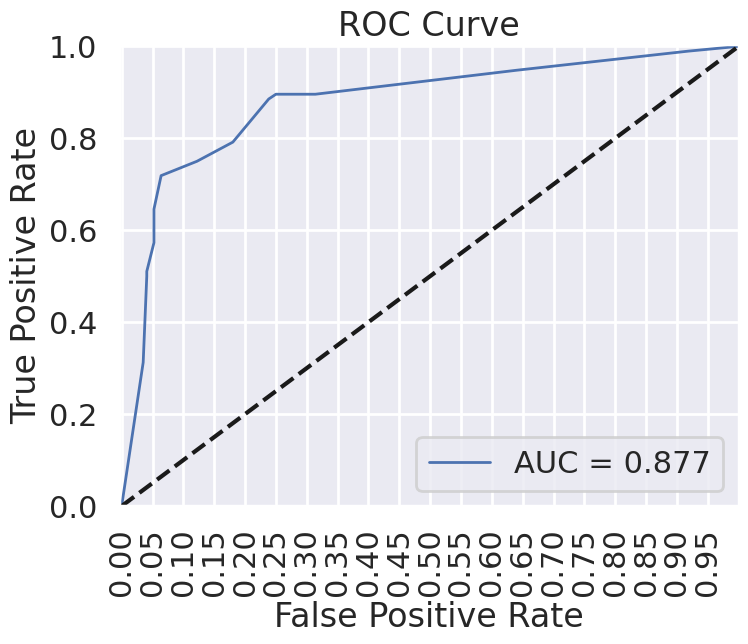

In [35]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

## Ploting Decision Tree

Loading packages

In [36]:
#!pip install pydotplus

In [37]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [38]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

Download Graphviz 2.38 from this [link](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) and install. Then run below line as per your intallation path. (This step is one time)

In [39]:
import os
os.environ["Path"] += os.pathsep + 'C:/Users/Arslan/Documents/Data science/Advanced Classification2/graphviz-2.38/release/bin'

KeyError: ignored

In [40]:
dot_data = StringIO()

In [41]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [42]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

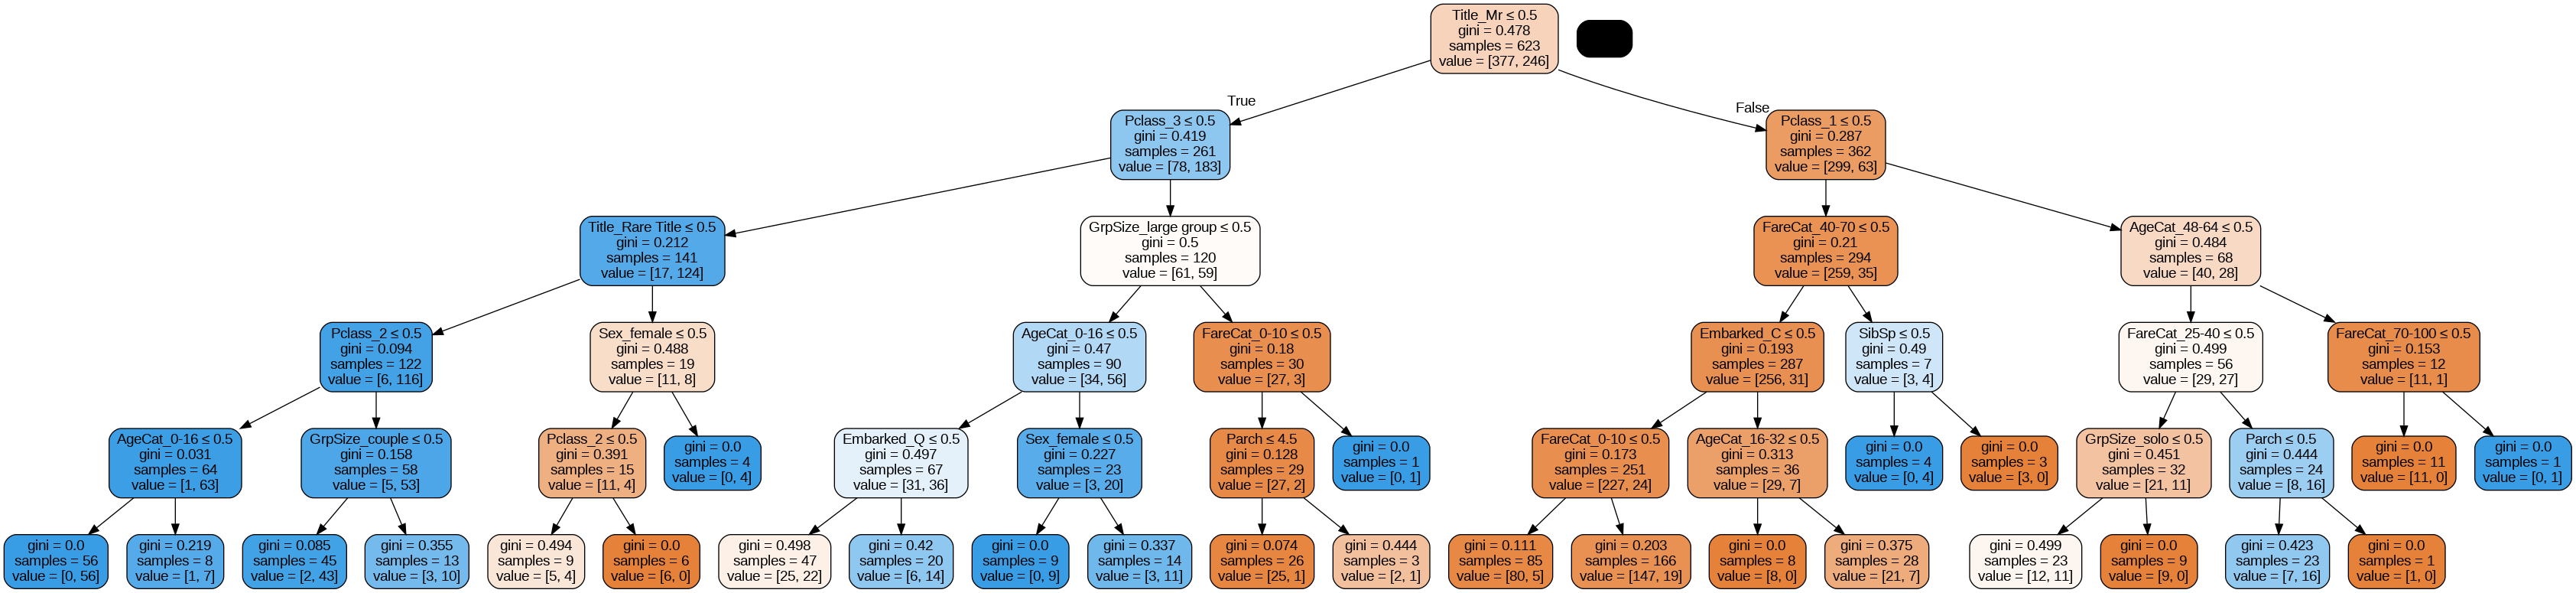

In [43]:
Image(graph.create_png())

Exporting PNG file of Decision Trees

In [44]:
graph.write_png('Decision Tree_Titanic.png')

True

## Features Importance

In [45]:
clf_dt.feature_importances_

array([0.02034273, 0.00827851, 0.0561526 , 0.01023718, 0.11567121,
       0.02313747, 0.        , 0.00364897, 0.0089544 , 0.        ,
       0.        , 0.        , 0.50003447, 0.        , 0.05475077,
       0.00415523, 0.        , 0.07281474, 0.01755804, 0.01200812,
       0.        , 0.01696993, 0.01741398, 0.01087771, 0.        ,
       0.02372747, 0.00461479, 0.        , 0.01865166, 0.        ])

In [46]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [47]:
features_tuple

[('SibSp', 0.02034273161810328),
 ('Parch', 0.008278514762736253),
 ('Pclass_1', 0.05615260190907971),
 ('Pclass_2', 0.010237175201204958),
 ('Pclass_3', 0.11567120848158928),
 ('Sex_female', 0.02313746501793842),
 ('Sex_male', 0.0),
 ('Embarked_C', 0.003648974784269695),
 ('Embarked_Q', 0.008954398012505535),
 ('Embarked_S', 0.0),
 ('Title_Master', 0.0),
 ('Title_Miss', 0.0),
 ('Title_Mr', 0.5000344745277854),
 ('Title_Mrs', 0.0),
 ('Title_Rare Title', 0.05475077270053188),
 ('GrpSize_couple', 0.0041552312616239),
 ('GrpSize_group', 0.0),
 ('GrpSize_large group', 0.07281473588211367),
 ('GrpSize_solo', 0.01755804383206537),
 ('FareCat_0-10', 0.012008123451061071),
 ('FareCat_100+', 0.0),
 ('FareCat_25-40', 0.016969934969615682),
 ('FareCat_40-70', 0.017413984687990155),
 ('FareCat_70-100', 0.01087771065690245),
 ('FareCat_Oct-25', 0.0),
 ('AgeCat_0-16', 0.023727472950636493),
 ('AgeCat_16-32', 0.004614786339291931),
 ('AgeCat_32-48', 0.0),
 ('AgeCat_48-64', 0.018651658952954554),
 ('A

In [48]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [49]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5, 1.0, 'Decision Classifier - Features Importance')

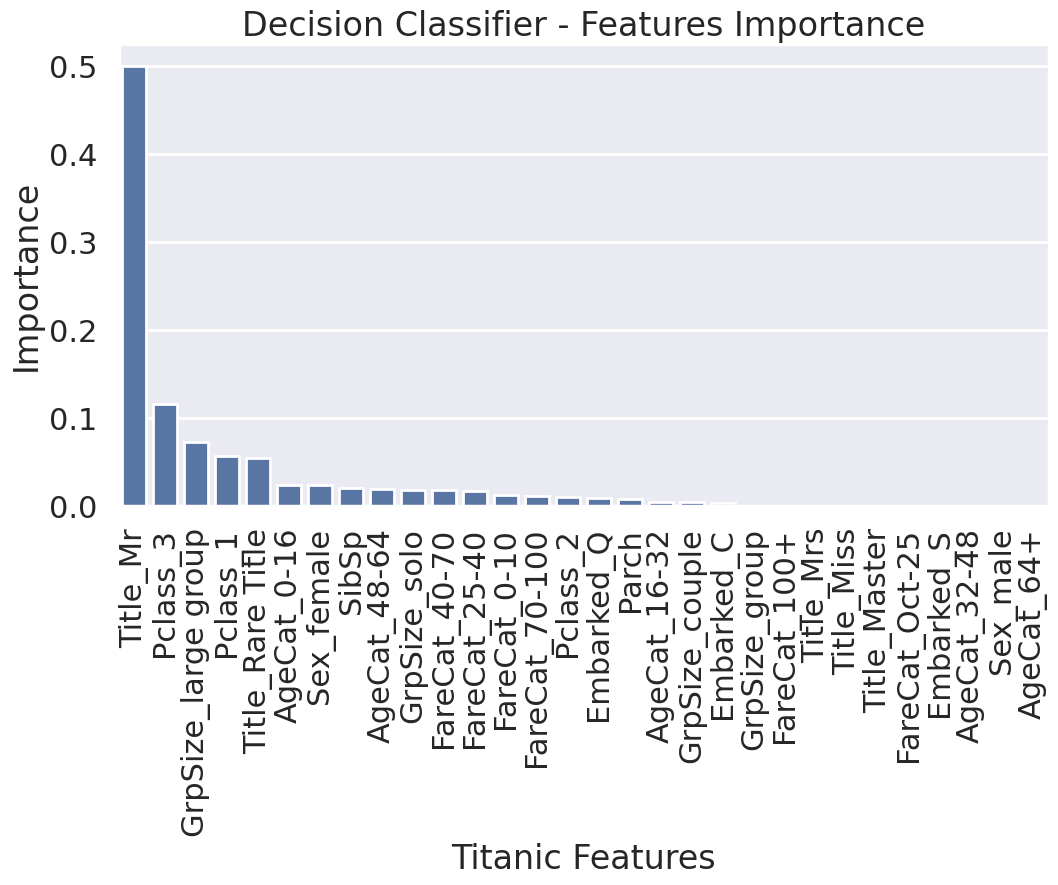

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")

# Random Forest

### Defining Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier(random_state=100, n_estimators=70, max_depth=3)

In [ ]:
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=3, n_estimators=70, random_state=100)

In [ ]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[:,1]

### Task 10: Find Precision for Random Forest

In [ ]:
#write code here
precision_rf=precision_score(ytest,rf_pred)
print("Precision: {}".format(precision_rf))

Precision: 0.8


### Task 11: Find Accuracy for Random Forest

In [ ]:
#write code here
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.8544776119402985


### Task 12: Find Recall for Random Forest

In [ ]:
#write code here
recall_rf = recall_score(ytest,rf_pred)
print("Recall: {}".format(recall_rf))

Recall: 0.7916666666666666


### Task 13: Find F1 Score for Random Forest

In [ ]:
#write code here
rf_f1=f1_score(ytest,rf_pred)
print("F1 Score: {}".format(rf_f1))

F1 Score: 0.7958115183246073


### Task 14: Print Classification Report for Random Forest

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#write code here
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       172
           1       0.80      0.79      0.80        96

    accuracy                           0.85       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



### ROC Curve for Random Forest<br>
Defining the function

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [ ]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

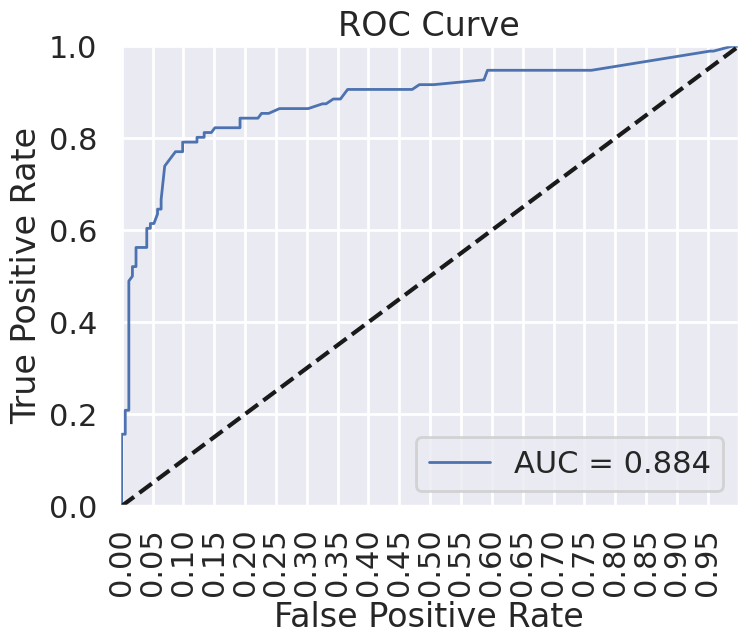

In [ ]:
auc_rf=roc_auc_score(ytest,rf_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

### Features Importance

In [ ]:
features_tuple=list(zip(X.columns,clf_rf.feature_importances_))

In [ ]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [ ]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

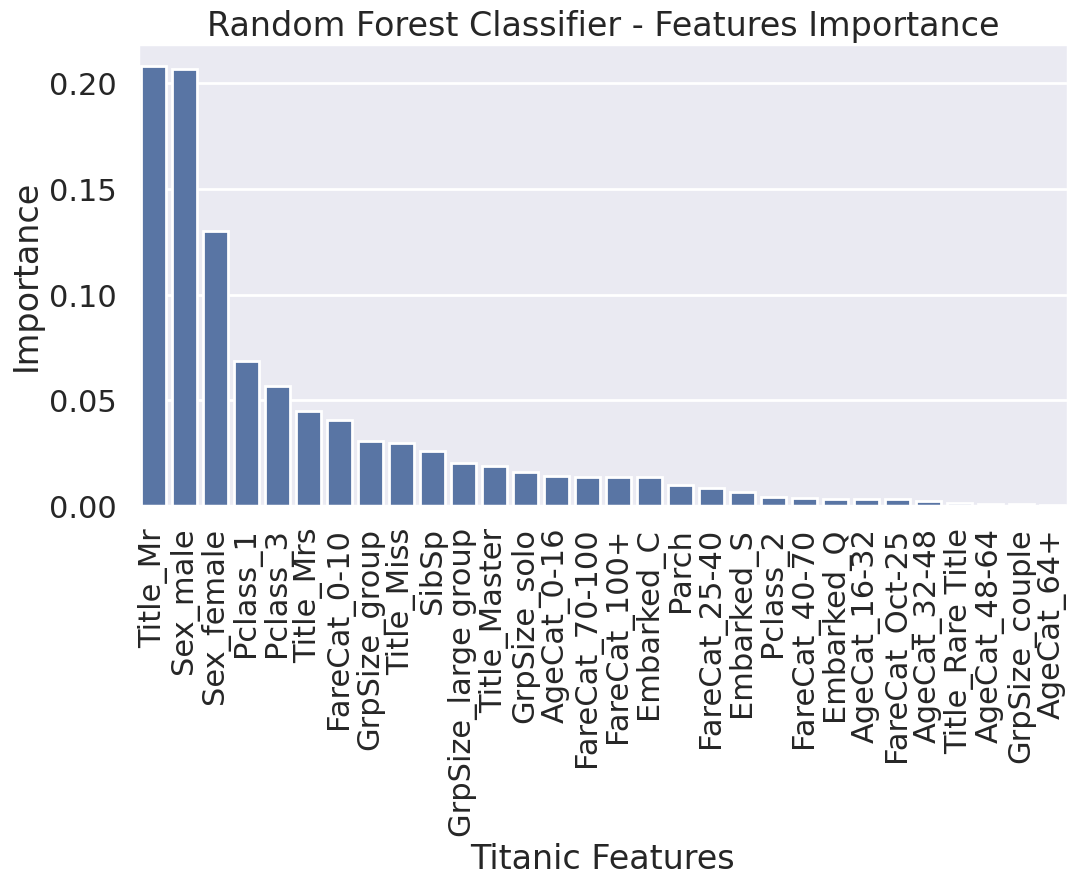

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

## Hyperparameter Tuning using GridSearchCV

Importing GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

Making grid of parameters and running GridSearch CV

In [ ]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='accuracy',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

#RF_cv1.cv_results_,
RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 54},
 0.8218709677419355)

So we found **'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 18** as optimum parameters

Let's try new set of parameter values near to optimum.

In [ ]:
param_grid2 = {"n_estimators" : [9,12,15,18,21,24,27],
           "max_depth" : [5,6,7,8,9,10,11,12,13,14,15],
           "min_samples_leaf" : [1,2,3,4]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='accuracy',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

#RF_cv2.grid_scores_,
RF_cv2.best_params_, RF_cv2.best_score_

({'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 15},
 0.826645264847512)

 So we found **'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 15** as optimum parameters

### Tuned Random Forest

In [ ]:
RF_grid = RF_cv2.best_estimator_

In [ ]:
RF_grid.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
rf_pred_t = RF_grid.predict(xtest)
rf_pred_prb_t=RF_grid.predict_proba(xtest)[:,1]

### Task 15: Find Accuracy for Tuned Random Forest

In [ ]:
#write code here
accuracy_rf_t = accuracy_score(ytest,rf_pred_t)
print("Accuracy after tuning: {}".format(accuracy_rf_t))

Accuracy after tuning: 0.835820895522388


### Task 16: Find Recall for Tuned Random Forest

In [ ]:
#write code here
recall_rf_t=recall_score(ytest,rf_pred_t)
recall_rf_t

0.8020833333333334

### Task 17: Find Precision for Tuned Random Forest

In [ ]:
#write code here
precision_rf_t=precision_score(ytest, rf_pred_t)
precision_rf_t

0.7549019607843137

### Task 18: Find F1 Score

In [ ]:
#write code here
rf_t_f1=f1_score(ytest,rf_pred_t)
rf_t_f1

0.7777777777777777

### Task 19: Print Classification Report for Tuned Random Forest

In [ ]:
#write code here
print(classification_report(ytest,rf_pred_t))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       172
           1       0.75      0.80      0.78        96

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.84      0.84       268



### ROC Curve for Tuned Random Forest

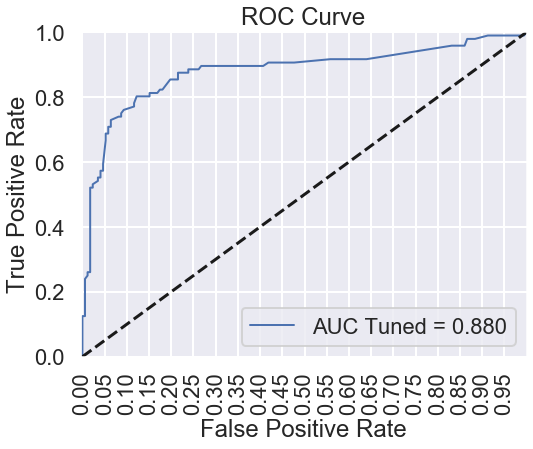

In [ ]:
auc_rf_t=roc_auc_score(ytest,rf_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC Tuned = %0.3f'% auc_rf_t)

### Hyperparameters Tuning Using Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_rs = RandomForestClassifier(random_state=100)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [ ]:
random_grid1 = {"n_estimators" : n_estimators,
           "max_depth" : max_depth,
           "min_samples_split" :min_samples_split}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_rs, param_distributions = random_grid1, n_iter = 50, cv = 5, verbose=2, random_state=100)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.7s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.6s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.6s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.6s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.5s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=   0.8s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=   0.6s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=   0.6s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 ..

[CV]  n_estimators=890, min_samples_split=2, max_depth=40, total=   1.0s
[CV] n_estimators=890, min_samples_split=2, max_depth=40 .............
[CV]  n_estimators=890, min_samples_split=2, max_depth=40, total=   1.0s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.7s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.7s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.7s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.7s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   1.3s
[CV] n_estimators=780, min_samples_split=10, max_depth=50 .....

[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   0.9s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   0.9s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   1.0s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   1.0s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   0.9s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ............
[CV]  n_estimators=340, min_samples_split=5, max_depth=110, total=   0.4s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ............
[CV]  n_estimators=340, min_samples_split=5, max_depth=110, total=   0.4s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ...

[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   0.4s
[CV] n_estimators=340, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   0.4s
[CV] n_estimators=340, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   0.4s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=   1.1s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=   1.0s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=   1.0s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=   1.0s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 ......

[CV]  n_estimators=340, min_samples_split=10, max_depth=100, total=   0.4s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.5s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.4s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.5s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.4s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.5s
[CV] n_estimators=670, min_samples_split=2, max_depth=90 .............
[CV]  n_estimators=670, min_samples_split=2, max_depth=90, total=   0.8s
[CV] n_estimators=670, min_samples_split=2, max_depth=90 ....

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

**Selecting the best classifier**

In [ ]:
clf_rf_rand=rf_random.best_estimator_

In [ ]:
clf_rf_rand.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf_rand=clf_rf_rand.predict(xtest)

In [ ]:
prb_rf_rand=clf_rf_rand.predict_proba(xtest)[:,1]

### Task 20: Find the Accuracy of Tuned Random Forest through Randomized Search

In [ ]:
#write code here
accuracy_rf_r= accuracy_score(ytest,pred_rf_rand)
accuracy_rf_r

0.832089552238806

### Task 21: Find the Precision of Tuned Random Forest through Randomized Search

In [ ]:
#write code here
precision_rf_r=precision_score(ytest,pred_rf_rand)
precision_rf_r

0.7475728155339806

### Task 22: Find the Recall of Tuned Random Forest through Randomized Search

In [ ]:
#write code here
recall_rf_r=recall_score(ytest,pred_rf_rand)
recall_rf_r

0.8020833333333334

### Task 23: Find the F1-Score of Tuned Random Forest through Randomized Search

In [ ]:
#write code here
f1_rf_r=f1_score(ytest,pred_rf_rand)
f1_rf_r

0.7738693467336684

### Task 24: Print the Classification Report of Tuned Random Forest through Randomized Search

In [ ]:
#write code here
print(classification_report(ytest,pred_rf_rand))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.75      0.80      0.77        96

    accuracy                           0.83       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



### ROC Curve

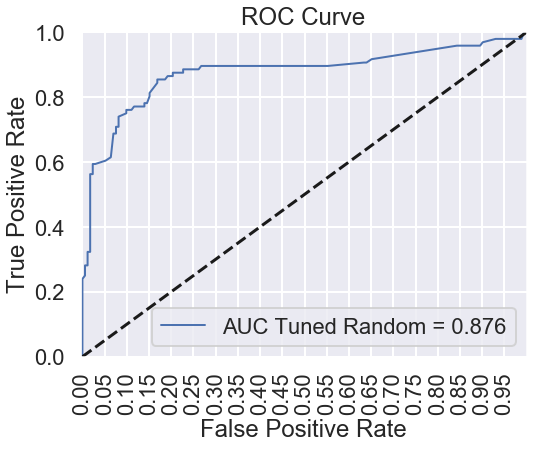

In [ ]:
auc_rf_r=roc_auc_score(ytest,prb_rf_rand)
fpr,tpr,threshold=roc_curve(ytest,prb_rf_rand)
plot_roc_curve(fpr,tpr,label='AUC Tuned Random = %0.3f'% auc_rf_r)

# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [ ]:
pred_clf_adb=clf_adb.predict(xtest)

In [ ]:
adb_pred_prb=clf_adb.predict_proba(xtest)[:,1]

### Task 25: Find Accuracy for Ada Boost

In [ ]:
#write code here
accuracy_adb=accuracy_score(ytest,pred_clf_adb)
accuracy_adb

0.8283582089552238

### Task 26: Find Precision for Ada Boost

In [ ]:
#write code here
precision_adb=precision_score(ytest, pred_clf_adb)
precision_adb

0.7272727272727273

### Task 27: Find Recall for Ada Boost

In [ ]:
#write code here
recall_adb=recall_score(ytest,pred_clf_adb)
recall_adb

0.8333333333333334

### Task 28: Find F1 Score for Ada Boost

In [ ]:
#write code here
f1_adb=f1_score(ytest, pred_clf_adb)
f1_adb

0.7766990291262137

### Task 29: Print Classification Report for Ada Boost

In [ ]:
#write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       172
           1       0.73      0.83      0.78        96

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



### ROC Curve

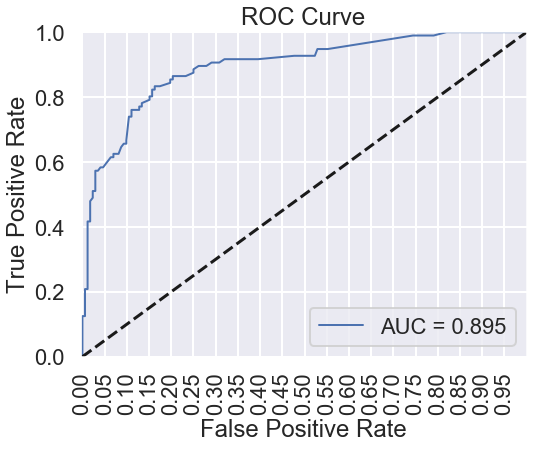

In [ ]:
auc_adb=roc_auc_score(ytest,adb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,adb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_adb)

# XGBoost

## Extreme Gradient Boosting Algorithm

In [ ]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz


ERROR: Files/directories not found in C:\Users\Arslan\AppData\Local\Temp\pip-install-txp5bh24\xgboost\pip-egg-info


In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [ ]:
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=25,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

### Task 30: Find Accuracy of XGBoost

In [ ]:
#write code here
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

Accuracy: 0.8246268656716418


### Task 31: Find  Recall of XGBoost

In [ ]:
#write code here
recall_xgb = recall_score(ytest,xgb_pred)
recall_xgb

0.7916666666666666

###  Task 32: Find  Precision of XGBoost

In [ ]:
#write code here
precision_xgb = precision_score(ytest,xgb_pred)
precision_xgb

0.7378640776699029

### Task 33: Find F1 Score XGB

In [ ]:
#write code here
xgb_f1=f1_score(ytest,xgb_pred)
xgb_f1

0.7638190954773869

### Task 34: Print Classification Report of XGBoost

In [ ]:
#write code here
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       172
           1       0.74      0.79      0.76        96

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.82      0.83       268



### ROC Curve

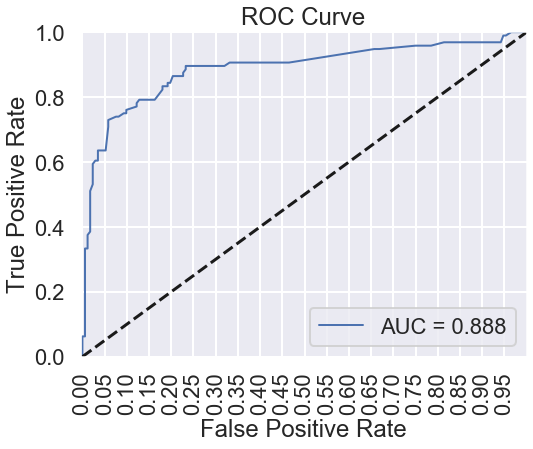

In [ ]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

# Comparison

In [ ]:
comparison_dict={"Algorithm":["Decision Tree","Random Forest","Tuned Random Forest(Grid)","Tuned Random Forest(Random)","XGBoost","Ada Boost"],
                 "Accuracy":[accuracy_dt,accuracy_rf,accuracy_rf_t,accuracy_rf_r,accuracy_xgb,accuracy_adb],
                 "Precision":[precision_dt,precision_rf,precision_rf_t,precision_rf_r,precision_xgb,precision_adb],
                 "Recall":[recall_dt,recall_rf,recall_rf_t,recall_rf_r,recall_xgb,recall_adb],
                 "AUC":[auc_dt,auc_rf,auc_rf_t,auc_rf_r,auc_xgb,auc_adb],
                 "F1 Score":[dt_f1,rf_f1,rf_t_f1,f1_rf_r,xgb_f1,f1_adb]
                }

In [ ]:
comparison=pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall','Accuracy', 'AUC'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,AUC,F1 Score
5,Ada Boost,0.828358,0.727273,0.833333,0.895409,0.776699
2,Tuned Random Forest(Grid),0.835821,0.754902,0.802083,0.880178,0.777778
3,Tuned Random Forest(Random),0.832090,0.747573,0.802083,0.875575,0.773869
1,Random Forest,0.854478,0.800000,0.791667,0.884054,0.795812
4,XGBoost,0.824627,0.737864,0.791667,0.888021,0.763819
0,Decision Tree,0.832090,0.774194,0.750000,0.877422,0.761905


# Submission on Kaggle

### Task 35: Import test data

In [ ]:
#Write code here
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


### Task 36: Do One Hot encoding of test data

In [ ]:
#write code here
df_OneHot=pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()
df_test=df_OneHot.copy()

### Task 37: Separate Passenger ID for submission

In [ ]:
#Write code here
PassengerID=df_test['PassengerId']
df_test.drop('PassengerId',axis=1,inplace=True)

### Task 38: Do prediction through final model

In [ ]:
#write code here
pred_final=clf_adb.predict(df_test)

#### Creating Data Frame for submission

In [ ]:
submission=pd.DataFrame({'PassengerId':PassengerID,'Survived':pred_final})

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Task 10: Export the dataset into csv file

In [ ]:
# Write code here
submission.to_csv('my_submission v2.0.csv',index=False)